In [ ]:
#Edgar Moises Hernandez-Gonzalez
#11/11/19-13/11/19
#Clasificar RAW con LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1000, 22)
(288, 1000, 22)


In [9]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(1000,22)))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1000, 64)          22272     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 260       
Total params: 55,556
Trainable params: 55,556
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=18, validation_data=(x_test, y_test)) #cambiar a 20 epocas

Train on 288 samples, validate on 288 samples
Epoch 1/10
288/288 [==============================] - 156s 542ms/sample - loss: 1.3926 - acc: 0.2847 - val_loss: 1.3875 - val_acc: 0.2743
Epoch 2/10
288/288 [==============================] - 163s 566ms/sample - loss: 1.3764 - acc: 0.2951 - val_loss: 1.3920 - val_acc: 0.2639
Epoch 3/10
288/288 [==============================] - 156s 541ms/sample - loss: 1.3611 - acc: 0.3090 - val_loss: 1.3877 - val_acc: 0.2986
Epoch 4/10
288/288 [==============================] - 149s 516ms/sample - loss: 1.3322 - acc: 0.3611 - val_loss: 1.3921 - val_acc: 0.2986
Epoch 5/10
288/288 [==============================] - 153s 530ms/sample - loss: 1.3120 - acc: 0.3924 - val_loss: 1.4026 - val_acc: 0.3021
Epoch 6/10
288/288 [==============================] - 155s 537ms/sample - loss: 1.3021 - acc: 0.3611 - val_loss: 1.3947 - val_acc: 0.3056
Epoch 7/10
288/288 [==============================] - 145s 505ms/sample - loss: 1.2572 - acc: 0.4028 - val_loss: 1.4001 - val_

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 29s 101ms/sample - loss: 1.4890 - acc: 0.3125
Test loss: 1.4890042543411255
Test accuracy: 0.3125


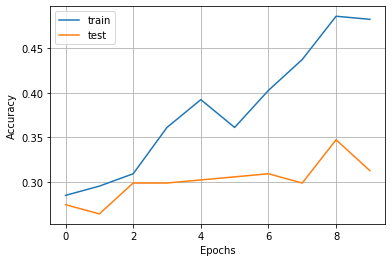

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

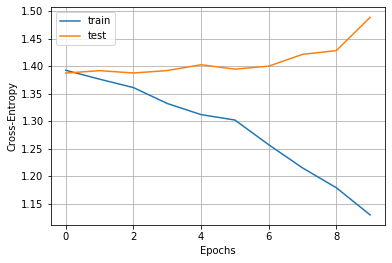

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.08333333333333337


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[21 40  6  5]
 [14 43 10  5]
 [16 31 10 15]
 [15 23 18 16]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.32      0.29      0.30        72
           1       0.31      0.60      0.41        72
           2       0.23      0.14      0.17        72
           3       0.39      0.22      0.28        72

   micro avg       0.31      0.31      0.31       288
   macro avg       0.31      0.31      0.29       288
weighted avg       0.31      0.31      0.29       288

